# Analyzing Simulated Power Spectra

This notebook will go over analyzing simulated power spectra.

Note that this script covers how the simualated power spectra are analyzed, but the main analysis of the simualated data is done by a script, that is available in `/scripts`.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import *
from settings import *
from paths import DATA_PATHS as dp

## Analyze results from high-band-power-varied simulations

In [3]:
# Load data
pw_dat = np.load(dp.make_file_path(dp.demo, 'PW_DEMO', 'npy'))

In [4]:
pw_syns = []

for val in pw_dat[2]:
    pw_syns.append(val.gaussian_params[0][1])

In [5]:
# Calculate band ratios
pw_ratios = []

for pw in pw_dat[1]:
    pw_ratios.append(calc_band_ratio(pw_dat[0], pw, THETA_BAND, BETA_BAND))

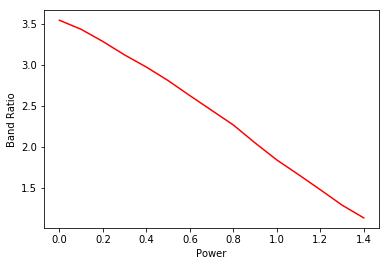

In [6]:
# Create DataFrame
pw_cols = np.array([pw_ratios, pw_syns]).T.tolist()

df_pw = pd.DataFrame(pw_cols, columns=["Band Ratio", "power"])

plt.xlabel("Power")
plt.ylabel("Band Ratio")

# Fill in axes
plt.plot(df_pw.power, df_pw["Band Ratio"], color='r')

Recall that we varied the power of the higher band. Here we see that as power increases, the band ratio value decreases. This is consistent with expectation since band ratios are calculated as avg(low-band power)/ (high-band power). As the denominator increases, which is reflected by increasing the power of the higher band, band ratios decrease.

## Aperiodic component and amplitude varied analysis

In this section we will see how varying the aperiodic component and amplitude affects band ratios. 

We will use heat-maps to visualize how the aforementioned parameters affect band ratios.

In [7]:
# Load Data
exp_pw_dat = np.load(dp.make_file_path(dp.demo, 'EXP_PW_DEMO', 'npy'))

In [8]:
data = []

for param in exp_pw_dat:
    inner_list = []
    freqs = param[1]

    for psd in param[2]:
        curr_ratio = calc_band_ratio(freqs, psd, THETA_BAND, BETA_BAND)
        inner_list.append(curr_ratio)
    data.append(inner_list)

The following cells will set up a list of aperiodic exponents and high-band powers to be used to make a table of corresponding ratio values

Text(33.0, 0.5, 'Exponent')

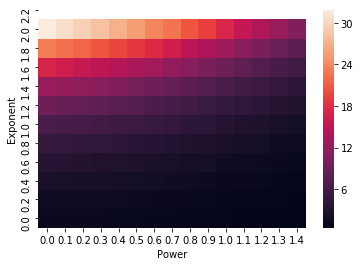

In [9]:
ax = sns.heatmap(data, xticklabels=PWS, yticklabels=EXPS)

ax.invert_yaxis()
plt.xlabel("Power")
plt.ylabel("Exponent")

Here we see that lower values of high-band amplitude and high exponent values lead to higher ratio values, this is consistent with our isolated power simulation findings.

## Plotting interacting parameters with logged ratios

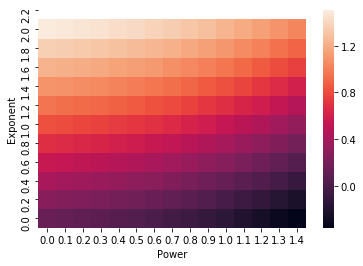

In [10]:
logged_data =np.log10(data)
ax = sns.heatmap(logged_data, xticklabels=PWS, yticklabels=EXPS)

ax.invert_yaxis()
plt.xlabel("Power");
plt.ylabel("Exponent");

Here is the same plot but with logged ratio values.